<a href="https://colab.research.google.com/github/shantam21/Deep-Learning-with-TensorFlow-2-and-Keras/blob/master/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification with the MNIST Dataset

When working with images for deep learning, we need both the images themselves, usually denoted as `X`, and also, correct [labels](https://developers.google.com/machine-learning/glossary#label) for these images, usually denoted as `Y`. Furthermore, we need `X` and `Y` values both for *training* the model, and then, a separate set of `X` and `Y` values for *validating* the performance of the model after it has been trained. Therefore, we need 4 segments of data for the MNIST dataset:

1. `x_train`: Images used for training the neural network
2. `y_train`: Correct labels for the `x_train` images, used to evaluate the model's predictions during training
3. `x_valid`: Images set aside for validating the performance of the model after it has been trained
4. `y_valid`: Correct labels for the `x_valid` images, used to evaluate the model's predictions after it has been trained

The process of preparing data for analysis is called [Data Engineering](https://medium.com/@rchang/a-beginners-guide-to-data-engineering-part-i-4227c5c457d7). To learn more about the differences between training data and validation data (as well as test data), check out [this article](https://machinelearningmastery.com/difference-test-validation-datasets/) by Jason Brownlee.

## Load Data

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_valid.shape

(10000, 28, 28)

In [8]:
x_train.dtype

dtype('uint8')

In [9]:
x_train.min()

0

In [10]:
x_train.max()

255

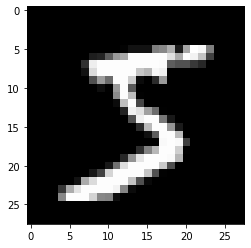

In [11]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

In [12]:
y_train[0]

5

## Preparing the Data for Training

In deep learning, it is common that data needs to be transformed to be in the ideal state for training. For this particular image classification problem, there are 3 tasks we should perform with the data in preparation for training:
1. Flatten the image data, to simplify the image input into the model
2. Normalize the image data, to make the image input values easier to work with for the model
3. Categorize the labels, to make the label values easier to work with for the model

### Flattening the image data

Though it's possible for a deep learning model to accept a 2-dimensional image (in our case 28x28 pixels), we're going to simplify things to start and [reshape](https://www.tensorflow.org/api_docs/python/tf/reshape) each image into a single array of 784 continuous pixels (note: 28x28 = 784). This is also called flattening the image.

Here we accomplish this using the helper method `reshape`:

In [13]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

In [14]:
x_train.shape

(60000, 784)

In [15]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### Normalizing the Image Data

Deep learning models are better at dealing with floating point numbers between 0 and 1 (more on this topic later). Converting integer values to floating point values between 0 and 1 is called [normalization](https://developers.google.com/machine-learning/glossary#normalization), and a simple approach we will take here to normalize the data will be to divide all the pixel values (which if you recall are between 0 and 255) by 255:

In [16]:
x_train = x_train / 255
x_valid = x_valid / 255 

### Categorical Encoding


Consider for a moment, if we were to ask, what is 7 - 2? Stating that the answer was 4 is closer than stating that the answer was 9. However, for this image classification problem, we don't want the neural network to learn this kind of reasoning: we just want it to select the correct category, and understand that if we have an image of the number 5, that guessing 4 is just as bad as guessing 9.

As it stands, the labels for the images are integers between 0 and 9. Because these values represent a numerical range, the model might try to draw some conclusions about its performance based on how close to the correct numerical category it guesses.

Therefore, we will do something to our data called categorical encoding. This kind of transformation modifies the data so that each value is a collection of all possible categories, with the actual category that this particular value is set as true.

As a simple example, consider if we had 3 categories: red, blue, and green. For a given color, 2 of these categories would be false, and the other would be true:

|Actual Color| Is Red? | Is Blue? | Is Green?|
|------------|---------|----------|----------|
|Red|True|False|False|
|Green|False|False|True|
|Blue|False|True|False|
|Green|False|False|True|

This is what categorical encoding is, transforming values which are intended to be understood as categorical labels into a representation that makes their categorical nature explicit to the model. Thus, if we were using these values for training, we would convert...


```python
values = ['red, green, blue, green']
```
Rather than use "True" or "False", we could represent the same using binary, either 0 or 1:

|Actual Color| Is Red? | Is Blue? | Is Green?|
|------------|---------|----------|----------|
|Red|1|0|0|
|Green|0|0|1|
|Blue|0|1|0|
|Green|0|0|1|

... which a neural network would have a very difficult time making sense of, instead to:

```python
values = [
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 0, 1]
]
```

### Categorically Encoding the Labels


In [18]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [19]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

With the data prepared for training, it is now time to create the model that we will train with the data. This first basic model will be made up of several *layers* and will be comprised of 3 main parts:

1. An input layer, which will receive data in some expected format
2. Several [hidden layers](https://developers.google.com/machine-learning/glossary#hidden-layer), each comprised of many *neurons*. Each [neuron](https://developers.google.com/machine-learning/glossary#neuron) will have the ability to affect the network's guess with its *weight*, which are values that will be updated over many iterations as the network gets feedback on its performance and learns
3. An output layer, which will depict the network's guess for a given image

### Instantiating the Model

In [25]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [26]:
from tensorflow.keras.layers import Dense
model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Compiling the Model

The final step we need to do before we can actually train our model with data is to [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile) it. Here we specify a [loss function](https://developers.google.com/machine-learning/glossary#loss) which will be used for the model to understand how well it is performing during training. We also specify that we would like to track `accuracy` while the model trains:

In [27]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## Training the Model

Now that we have prepared training and validation data, and a model, it's time to train our model with our training data, and verify it with its validation data.

"Training a model with data" is often also called "fitting a model to data." Put this latter way, it highlights that the shape of the model changes over time to more accurately understand the data that it is being given.

When fitting (training) a model with Keras, we use the model's [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method. It expects the following arguments:

* The training data
* The labels for the training data
* The number of times it should train on the entire training dataset (called an *epoch*)
* The validation or test data, and its labels

Run the cell below to train the model. We will discuss its output after the training completes:

In [28]:
history = model.fit(
    x_train, y_train, epochs=3, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3094 - accuracy: 0.9051 - val_loss: 0.1398 - val_accuracy: 0.9643
Epoch 2/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1037 - accuracy: 0.9727 - val_loss: 0.1382 - val_accuracy: 0.9677
Epoch 3/3
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0785 - accuracy: 0.9794 - val_loss: 0.1119 - val_accuracy: 0.9768
